In [54]:
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system
from pandas.core.algorithms import value_counts     #Extra import voor value_counts xx
from scipy import stats
import math
from sklearn.linear_model import LinearRegression
from datetime import datetime as datetime
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error  

In [ ]:
ais = pd.read_csv("https://raw.githubusercontent.com/DataRepo2019/Data-files/master/titanic.csv")


ais.set_index(['PassengerId'])        # set index/id
ais.Survived= ais.Survived.astype('category')             #Gaat de numerieke waarden van deze kolom aanschouwen als een categorie


ais.head()


# **Hoofdstuk 1 & 2 Grafieken tekenen** 



##Basis

Categoriën ordenen/categorie ordinaal maken

In [ ]:
embarked_type = CategoricalDtype(categories=['S','C','Q'], ordered=True)
ais.Embarked= ais.Embarked.astype(embarked_type)
ais.Embarked.describe()

Bepaalde kolommen selecteren

In [ ]:
ais[["PassengerId","Survived","Name"]]            ##Dubbele haken!!!
ais[ais['PassengerId'] < 6][["PassengerId",'Survived', 'Name']]          #Combinatie met if-else 
ais[(ais.sport == 'Netball')&('wt' == 63)]                               #combinatie van 2x if-else

In [ ]:
ais = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/ais.csv')

In [ ]:
print(ais.ferr.describe())
print('='*50)

In [ ]:
#quality of Life 
                                          ##Geeft een overzicht van alle variabelen
ais.sport.value_counts()                  ##Handig voor als je ze moet overtyppen voor een if-else case bijvoorbeeld                     

Row        37
T_400m     29
B_Ball     25
Netball    23
Swim       22
Field      19
W_Polo     17
T_Sprnt    15
Tennis     11
Gym         4
Name: sport, dtype: int64

In [ ]:
ais[ais.bmi >26 ] ['sport'].value_counts()            #gaat alle waardes dat hiertoe behoeren en overeen komen met elkaar samen tellen

## grafieken

In [ ]:
ais = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/ais.csv')
ais = ais.set_index(['id'])
ais.sex=ais.sex.astype('category')
ais.sport=ais.sport.astype('category')

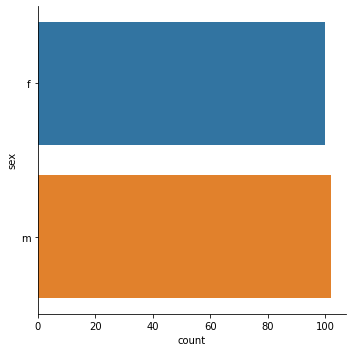

In [ ]:
sns.catplot(data=ais,kind="count",y="sex")

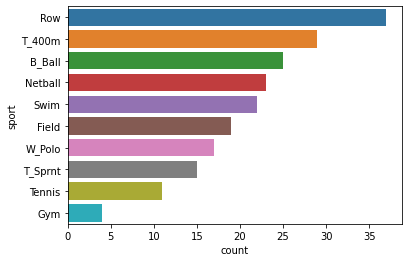

In [ ]:
#sns.catplot(data=ais,kind="count",y="sport")                                     #not sorted
sns.countplot(data=ais, y="sport", order = ais.sport.value_counts().index)        #sorted

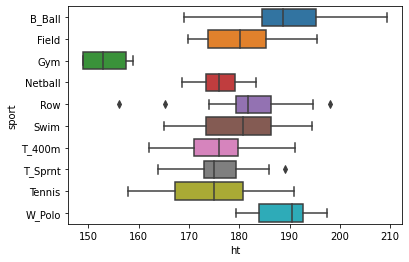

In [ ]:
sns.boxplot(data=ais,x='ht',y='sport')

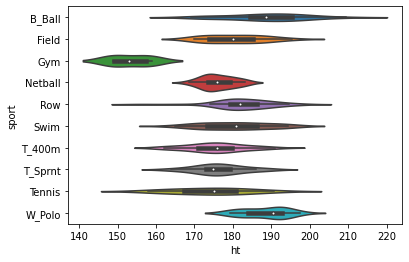

In [ ]:
sns.violinplot(data=ais,x='ht',y='sport')

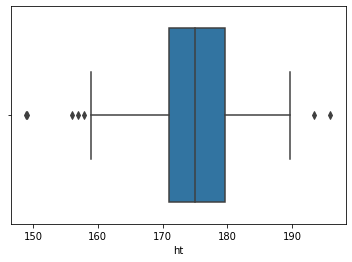

In [ ]:
sns.boxplot(data=ais[ais.sex=='f'],x='ht')

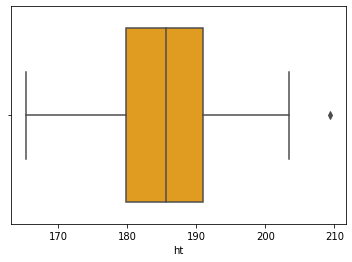

In [ ]:
sns.boxplot(data=ais[ais.sex=='m'],x='ht',color='orange')

## oefening 

In [ ]:
ais = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/ais.csv')
ais = ais.set_index(['id'])
ais.sex=ais.sex.astype('category')
ais.sport=ais.sport.astype('category')

In [ ]:
# ais[(ais.sport=='Row')|(ais.sport=='Netball')|(ais.sport=='Tennis')].ht.describe()     #Zonder tussenstap


data=ais[(ais.sport=='Row')|(ais.sport=='Netball')|(ais.sport=='Tennis')]               #met tussenstap
print(data.ht.describe())

count     71.000000
mean     179.066197
std        7.936371
min      156.000000
25%      174.250000
50%      179.500000
75%      183.400000
max      198.000000
Name: ht, dtype: float64


In [ ]:
data=ais[(ais.sport=='Row')|(ais.sport=='Netball')|(ais.sport=='Tennis')]
print(data.sex.describe())


count     71
unique     2
top        f
freq      52
Name: sex, dtype: object


## lab 02 

In [ ]:
ais.groupby('sport')['sex'].value_counts() #Groupby gebruiken


sport     
B_Ball   f    13
         m    12
Field    m    12
         f     7
Gym      f     4
         m     0
Netball  f    23
         m     0
Row      f    22
         m    15
Swim     m    13
         f     9
T_400m   m    18
         f    11
T_Sprnt  m    11
         f     4
Tennis   f     7
         m     4
W_Polo   m    17
         f     0
Name: sex, dtype: int64

In [ ]:
ais.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
id,,,,,,,,,,,,,
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


## Functies

In [ ]:
mpg = sns.load_dataset("mpg")      # Characteristics of cars
tips = sns.load_dataset("tips")    # Info on tips given at restaurants

In [ ]:
#lange versie

print(f"Mean:                {tips['tip'].mean()}")
print(f"Standard deviation:  {tips['tip'].std()}") # Pay attention: n-1 in the denominator
print(f"Variance:            {tips['tip'].var()}") # Pay attention: n-1 in the denominator
print(f"Skewness:            {tips['tip'].skew()}")
print(f"Kurtosis:            {tips['tip'].kurtosis()}")

# Median & co
print(f"Minimum:   {tips['tip'].min()}")
print(f"Median:    {tips['tip'].median()}")
print(f"Maximum:   {tips['tip'].max()}")
percentiles = [0.0, 0.25, 0.5, 0.75, 1.0]
print("Percentiles", percentiles, "\n", tips['tip'].quantile(percentiles))
print("Inter Quartile Range:", tips['tip'].quantile(.75) - tips['tip'].quantile(.25))
print(f"Range :    {tips['tip'].max() - tips['tip'].min()}")

In [ ]:
#korte versie
tips["tip"].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

# **Hoofdstuk 3 Normaalverdeling + T-verdeling** 

## Normaalverdeling functies



In [ ]:
mu= 5             #gemiddelde
sigma = 1.5       #deviatie
x = 6             #x-waarde
p=0.40            #percentage

In [ ]:
#probabilty density function: berekend de Y-waarde die overeenkomt met x (is niet hetzelfde als een kans)

pdf_value = stats.norm.pdf(x, loc=mu, scale=sigma)   
print(pdf_value)

#Cumulatieve distributie functie: kans dat een waarde kleiner is dan x (berekend de oppervlakte onder de curve)
#cdf_value= stats.norm.cdf(x, loc=mu, scale=sigma)
#print(cdf_value)

#Survival function: kans dat de waarde groter is dan x
sf_value= stats.norm.sf(x, loc=mu, scale=sigma)
print(sf_value)


#Inversed survival function: x waarde dat komt overeen met het (meegegeven) percentage   
#ipv het percentage te berekenen, gaat deze de x-waarde berekenen (omgekeerde van de sf-function)

isf_value = stats.norm.isf(sf_value, loc=mu, scale=sigma)
print(isf_value)



0.2129653370149015
0.2524925375469229
6.0


## Centrale limiet stelling


###aantonen dat de gemiddeldes een normaal verdeling zijn

In [ ]:
ais = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/ais.csv')


In [ ]:
ais.head()

,id,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


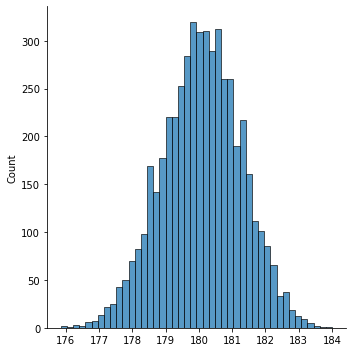

In [ ]:
arr =np.array([])
for i in range(5000):
  arr=np.append(arr,ais['ht'].sample(n=50).mean())

sns.displot(arr)

### werken met centrale limietstelling

In [ ]:
mu= 12.1             #gemiddelde
sigma = 3.8/math.sqrt(43)       #deviatie van sample/sample grootte = deviatie
x = 11             #x-waarde
p=0.40            #percentage


In [ ]:
cdf_value= stats.norm.cdf(x, loc=mu, scale=sigma)
print(cdf_value)

0.02883448270747309


## Normaal verdeling (Betrouwbaarheidsinterval + Z-score)



In [ ]:
sample = np.array([123,22,55,44,66,45,8489,5,4,84,35,4,84,5,43,84,3,354,354,546,2134,8943,4849])

m= 5.2                          #Sample mean                                  m=(sample.mean())
s= 1.5                          #Populatie standaardafwijking/sigma
n= 100                          #Sample size                                  n=sample_size=len(sample)
alpha= 0.5                      #1-alpha = betrouwbaarheids gebied (95%)
x = 5.4                         #meegegeven variabele

In [ ]:
z_score=(x-m)/s                                         #z-score berekenen
print("Z-score voor %.1f is: %.2f" % (x,z_score))


z_alpha_div2=stats.norm.isf(alpha/2)                         #alpha/2 bereken
#z_alpha_div2=stats.t.isf(alpha/2,n-1)                       #enkel gebruiken indien de s van de populatie onbekend is of n<30 
print("z_alpha/2: %f.5" % z_alpha_div2)                      #getal dat overeenkomt met alpha/2 op de norm



lower_limit =m - (z_alpha_div2*s / math.sqrt(n))               #Betrouwbaarheids interval berekenen
upper_limit =m + (z_alpha_div2*s / math.sqrt(n))


print("Confidence interval: [%.5f ,%.5f]" % (lower_limit,upper_limit))


Z-score voor 5.4 is: 0.13
z_alpha/2: 0.674490.5
Confidence interval: [5.09883 ,5.30117]


## T-verdeling


In [ ]:
m= 5.2                #Sample mean                                  m=(sample.mean())
s= 1.5              #Populatie standaardafwijking/sigma
n = 15               #Sample size                                  n=sample_size=len(sample)
alpha=0.05          #1-alpha = betrouwbaarheids gebied (95%)

In [ ]:
t = stats.t.isf(alpha/2, df=n-1)                #T-score berekenen
print("T-score: %.5f" % t)


lower_limit= m - (t*s / math.sqrt(n))
upper_limit= m + (t*s / math.sqrt(n))

print("Confidence interval: [%.5f ,%.5f]" % (lower_limit,upper_limit))


T-score: 2.14479
Confidence interval: [4.36933 ,6.03067]


## Grafiek plotten


### normaal verdeling plotten

In [ ]:
m = 2.5
s = 1.5
x1 = 0.5
x2 = 4

oppervlakte onder de grafiek:0.75013



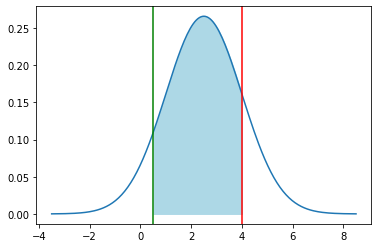

In [ ]:
a = stats.norm.cdf(x1,loc=m,scale=s)
b= stats.norm.cdf(x2,loc=m,scale=s)
print("oppervlakte onder de grafiek:%.5f" % (b-a))
print("")

x = np.linspace(m - 4*s, m + 4*s,201)
y=stats.norm.pdf(x, m, s)
plt.plot(x,y)
# Left tail probability plot


# Fill the area left of x
plt.fill_between(x, 0, y, where=(x1 <= x) &(x2>=x), color='lightblue')
# Show the mean with an orange line
# plt.axvline(m, color="orange", lw=2)                              %toont het gemiddelde
# Show x with a green line
plt.axvline(x1, color="green")
plt.axvline(x2, color="red")



#bonus
#y_cdf = stats.norm.cdf(x,loc=m,scale=s)                                  #De kans dat de het getal kleiner zou zijn dan de x waarde op dat moment (wanneer je op het gemiddelde zit is y = 0.5 dan heb je 50% kans dat de waarde kleiner is dan x/gemiddelde (op dit moment))
#plt.plot(x,y_cdf)                                                        #Wanneer y=1 heb je 100% kans dat de waarde gelijk kleiner is dan x

###T-verdeling plotten

In [ ]:
m = 0
s = 1
x1 = 0.5
x2 = 4
df = 3            #Aantal vrijheidsgraden

oppervlakte onder de grafiek:0.31172



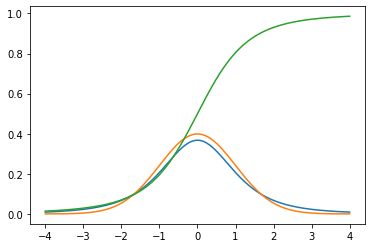

In [ ]:
a = stats.t.cdf(x1,df=df)
b= stats.t.cdf(x2,df=df)
print("oppervlakte onder de grafiek:%.5f" % (b-a))
print("")

x = np.linspace(m - 4*s, m + 4*s,201)
t=stats.t.pdf(x, df)
plt.plot(x,t)
# Left tail probability plot


# Fill the area left of x
#plt.fill_between(x, 0, t, where=(x1 <= x) &(x2>=x), color='lightblue')
# Show the mean with an orange line
# plt.axvline(m, color="orange", lw=2)                              %toont het gemiddelde
# Show x with a green line
#plt.axvline(x1, color="green")
#plt.axvline(x2, color="red")
y=stats.norm.pdf(x, m, s)
plt.plot(x,y)
#bonus
t_cdf = stats.t.cdf(x,df)                                  #De kans dat de het getal kleiner zou zijn dan de x waarde op dat moment (wanneer je op het gemiddelde zit is y = 0.5 dan heb je 50% kans dat de waarde kleiner is dan x/gemiddelde (op dit moment))
plt.plot(x,t_cdf)                                                        #Wanneer y=1 heb je 100% kans dat de waarde gelijk kleiner is dan x

## Oefening theorie vs praktijk





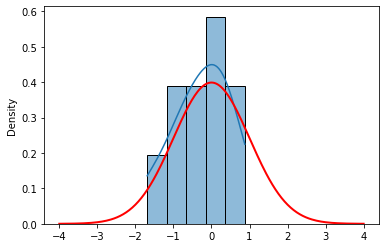

In [ ]:
n=10                   #Hoe groter n hoe nauwkeuriger dat de observaties gaan zijn
m=0
s=1

observaties = np.random.normal(loc = m ,scale=s,size=n)              #neemt n random waarden van de T-verdeling

obs_hist = sns.histplot(observaties,stat='density', kde=True)        #toont de verdeling en histogram van de uitkozen waarden


x_dist = np.linspace(m-4*s,m+4*s, num=201)
dist_y = stats.norm.pdf(x_dist,m,s)
obs_hist.plot(x_dist, dist_y,'red', lw=2)                           #toont de t-verdeling van de waarden


rode lijn is theorie 

blauw is praktijk

## oefeningen

### Excercise 1

oppervlakte onder de grafiek:0.75013



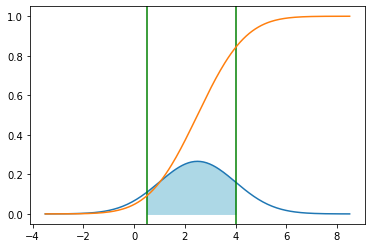

In [ ]:
m = 2.5
s = 1.5
x1 = 0.5
x2 = 4

a = stats.norm.cdf(x1,loc=m,scale=s)
b= stats.norm.cdf(x2,loc=m,scale=s)
print("oppervlakte onder de grafiek:%.5f" % (b-a))                  #Oppervlakte berekenen
print("")

x = np.linspace(m - 4*s, m + 4*s,201)
y=stats.norm.pdf(x, m, s)
plt.plot(x,y)
# Left tail probability plot


# Fill the area left of x
plt.fill_between(x, 0, y, where=(x1 <= x) &(x2>=x), color='lightblue')
# Show the mean with an orange line
# plt.axvline(m, color="orange", lw=2)                              %toont het gemiddelde
# Show x with a green line
plt.axvline(x1, color="green")
plt.axvline(x2, color="green")


y_cdf = stats.norm.cdf(x,loc=m,scale=s)
plt.plot(x,y_cdf)

### Exercise 2

kans dat x kleiner is dan 22.00 is 0.84
kans dat x tussen x1 en x2 ligt is 0.82
kans dat x groter is dan x3 is 0.69
Z-score: -2.25
Z-score: 1.50


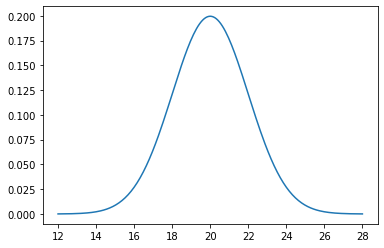

In [ ]:
n=64
m= 20
s=16/math.sqrt(n)
x1=22
x2=16
x=np.linspace(m - 4*s, m + 4*s,201)
y=stats.norm.pdf(x,m,s)
plt.plot(x,y)



a= stats.norm.cdf(x1, loc=m, scale=s)
print("kans dat x kleiner is dan %.2f is %.2f" % (x1,a))
b=stats.norm.cdf(x2, loc=m, scale=s)
print("kans dat x tussen x1 en x2 ligt is %.2f" %(a-b))
print("kans dat x groter is dan x3 is %.2f" % stats.norm.sf(19,loc=m,scale=s))


z1=(15.5-m)/s
print("Z-score: %.2f" % z1)

z2=(23-m)/s
print("Z-score: %.2f" % z2)

###Exercise 3

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/rlanders.csv').set_index(["ID"])
df.head

In [ ]:
s=df['Money'][:25].std()                                      #gebruikt enkel de eerste 25 waarden nemen van df
n=25
m=df['Money'][:25].mean()
alpha= 0.05

z_alpha_div2=stats.t.isf(alpha/2,n-1)                         #alpha/2 bereken    
print("alpha/2: %f.5" % z_alpha_div2)                        

lower_limit =m - (z_alpha_div2*s / math.sqrt(n))               #Betrouwbaarheids interval berekenen
upper_limit =m + (z_alpha_div2*s / math.sqrt(n))


print("Confidence interval: [%.5f ,%.5f]" % (lower_limit,upper_limit))

alpha/2: 2.063899.5
Confidence interval: [450.29121 ,536.66879]


# **Hoofdstuk 3 Hypothese testing** 

## Z-test

###Rechtzijdige Z-toets

In [ ]:
n=40
m=351.2
s=4.1
m_sample = 352.8                                   #Gemiddelde dat wordt waargenomen
s_sample = s/math.sqrt(n)       
significance = 0.05                                  #Significantie niveau 

de kans dat m_sample kleiner is dan 352.80 is 0.01
p_value > significance
0.01 > 0.05
Grens waarde > m_sample
 352.27 > 352.80


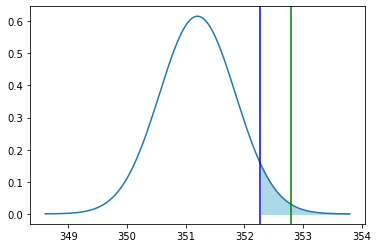

In [ ]:
#methode 1 
p_value = stats.norm.sf(m_sample, loc=m, scale=s_sample)
print("de kans dat m_sample kleiner is dan %.2f is %.2f" % (m_sample,p_value))      #indien p_value kleiner is dan significantie niveau(5%) verwerpen hypothese
print("p_value > significance")
print("%.2f > %.2f" % (p_value,significance))


#methode 2 eerst grenswaarde berekenen adhv significnatie niveau (5%) en kijken of deze waarde kleiner is dan m_sample
g_value = stats.norm.isf(significance, m, s_sample)                                    #grens waarde
print("Grens waarde > m_sample")                                                #indien g_value kleiner dan m_sample verwerpen hypothese
print(" %.2f > %.2f" % (g_value,m_sample))


#tekening maken
dist_x=np.linspace(m - 4 * s_sample,m + 4 * s_sample,num=201)
dist_y= stats.norm.pdf(dist_x,m,s_sample)

plt.plot(dist_x,dist_y)
plt.fill_between(dist_x,dist_y, where=dist_x >= g_value,color='lightblue')
plt.axvline(x=g_value, color='blue')
plt.axvline(x=m_sample, color='green')                                                  #indien groen in het blauw ligt = verwerpen

###Linkszijdige Z-test

In [ ]:
n=40
m=351.2
s=4.1
m_sample = 350.4                                  #Gemiddelde dat wordt waargenomen
s_sample = s/math.sqrt(n)       
significance = 0.05                                  #Significantie niveau 

de kans dat m_sample kleiner is dan m is 0.11
p_value > significance
0.11 > 0.05
m_sample > g_value
350.40 > 350.13


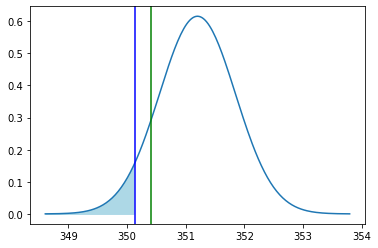

In [ ]:
#methode 1 
p_value = stats.norm.cdf(m_sample,loc=m,scale=s_sample)
print("de kans dat m_sample kleiner is dan m is %.2f" % p_value)             #indien p_value kleiner is dan significance (5%) -> nulhypothese verwerpen
print("p_value > significance")
print("%.2f > %.2f" % (p_value,significance))


#methode 2 
g_value = stats.norm.isf(1-significance,loc=m,scale=s_sample)                #!!!!(1-significance)
print("m_sample > g_value")                                                  #indien m_sample kleiner is dan nulhypothese verwerpen
print("%.2f > %.2f" % (m_sample,g_value))



#tekening
dist_x=np.linspace(m - 4 * s_sample,m + 4 * s_sample,num=201)
dist_y= stats.norm.pdf(dist_x,m,s_sample)

plt.plot(dist_x,dist_y)
plt.fill_between(dist_x,dist_y, where=dist_x <= g_value,color='lightblue')
plt.axvline(x=g_value, color='blue')
plt.axvline(x=m_sample, color='green')                                                  #indien groen in het blauw ligt = verwerpen nulhypothese

### Dubbelzijdige Z-test

In [ ]:
n=40
m=351.2
s=4.1
m_sample = 351.4                                  #Gemiddelde dat wordt waargenomen
s_sample = s/math.sqrt(n)       
significance = 0.05                                  #Significantie niveau 


de kans dat m_sample kleiner is dan 351.40 is 0.38
significane < p_value < significance
0.03 < 0.38 < 0.97
grens waarde < m_sample < grenswaarde
349.93 < 351.40 < 352.47


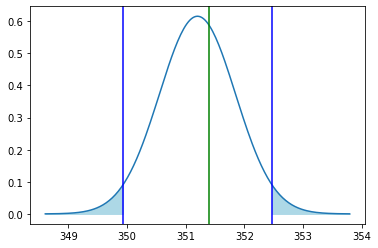

In [ ]:
#methode 1 
p_value = stats.norm.sf(m_sample, loc=m, scale=s_sample)


print("de kans dat m_sample kleiner is dan %.2f is %.2f" % (m_sample,p_value))      #indien niet tussen de waarden ligt dan verwerpen hypothese
print("significane < p_value < significance")
print("%.2f < %.2f < %.2f" % (significance/2,p_value,1-significance/2))


#methode 2 eerst grenswaarde berekenen adhv significnatie niveau (5%) en kijken of deze waarde kleiner is dan m_sample
g_upper = stats.norm.isf(significance/2, m, s_sample)                                    #grens waarde
g_lower = stats.norm.isf(1-significance/2,loc=m,scale=s_sample)
print("grens waarde < m_sample < grenswaarde")                                                         #indien m_sample niet tussen de waarde ligt dan verwerpen hypothese
print("%.2f < %.2f < %.2f" % (g_lower,m_sample,g_upper))


#tekening maken
dist_x=np.linspace(m - 4 * s_sample,m + 4 * s_sample,num=201)
dist_y= stats.norm.pdf(dist_x,m,s_sample)

plt.plot(dist_x,dist_y)
plt.fill_between(dist_x,dist_y, where=dist_x >= g_upper,color='lightblue')
plt.fill_between(dist_x,dist_y, where=dist_x <= g_lower,color='lightblue')

plt.axvline(x=g_upper, color='blue')
plt.axvline(x=g_lower, color='blue')
plt.axvline(x=m_sample, color='green')                                                  #windien groen in het blauw ligt = verwerpen

## oefeningen

###Exercise 1 Rechtzijdige T-test

de kans dat m_sample kleiner is dan m is 0.00
p_value > significance
0.000000 > 0.05
m_sample > g_value
52.33 > 76.71


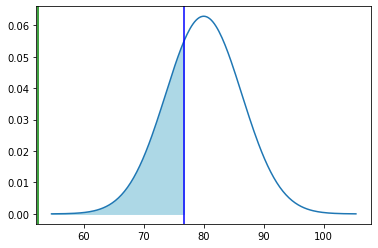

In [ ]:
pulses = [48,52,59,45,57,52,44,58,56,44,63,50]

n=len(pulses)
m=80
s=9
m_sample = np.mean(pulses)
s_sample = np.std(pulses, ddof=1)
significance = 0.05
#methode 1 
p_value = stats.t.cdf(m_sample, loc=m, scale = s_sample/math.sqrt(n), df=n-1)
print("de kans dat m_sample kleiner is dan m is %.2f" % p_value)             #indien p_value kleiner is dan significance (5%) -> nulhypothese verwerpen
print("p_value > significance")
print("%f > %.2f" % (p_value,significance))


#methode 2 
g_value = stats.t.isf(1-significance,loc=m,scale=s_sample/math.sqrt(n), df=n-1)                #!!!!(1-significance)
print("m_sample > g_value")                                                  #indien m_sample kleiner is dan nulhypothese verwerpen
print("%.2f > %.2f" % (m_sample,g_value))



#tekening
dist_x=np.linspace(m - 4 * s_sample,m + 4 * s_sample,num=201)
dist_y= stats.norm.pdf(dist_x,m,s_sample)

plt.plot(dist_x,dist_y)
plt.fill_between(dist_x,dist_y, where=dist_x <= g_value,color='lightblue')
plt.axvline(x=g_value, color='blue')
plt.axvline(x=m_sample, color='green')                                                  #indien groen in het blauw ligt = verwerpen nulhypothese




### Exercise 2

45.432100618494665
0.001302346104883357


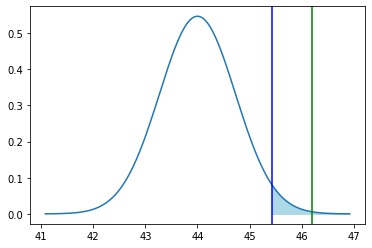

In [ ]:
m=44
s=6.2
n=72
m_sample= 46.2
s_sample = s/math.sqrt(n)
significance = 0.025

#1.
g_value=stats.norm.isf(significance,loc=m,scale=s_sample)
print(g_value)


#2.
p_value = stats.norm.sf(m_sample, loc = m, scale = s_sample)
print(p_value)

#tekening maken
dist_x=np.linspace(m - 4 * s_sample,m + 4 * s_sample,num=201)
dist_y= stats.norm.pdf(dist_x,m,s_sample)

plt.plot(dist_x,dist_y)
plt.fill_between(dist_x,dist_y, where=dist_x >= g_value,color='lightblue')
plt.axvline(x=g_value, color='blue')
plt.axvline(x=m_sample, color='green')                                                  #indien groen in het blauw ligt = verwerpen

###Excercise 3



In [ ]:
arr=[400,350,400,500,300,350,200,500,200,250,250,500,350,100]

m=300
n=len(arr)
m_sample = np.mean(arr)
s_sample = np.std(arr, ddof=1) / math.sqrt(n)
significance = 0.05

p_value = stats.t.sf(m_sample, loc=m, scale=s_sample, df=n-1)
print(p_value)

g_value = stats.t.isf(significance, loc=m, scale=s_sample, df=n-1)
g_value



0.1738147584626205


358.41687132781624

###Excercise 4

In [ ]:
rlanders = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/rlanders.csv')
rlanders.head()

,ID,Gender,Money,Days,Months,Count,Survey
0,1,Female,440,29,11,35,3
1,2,Female,503,23,10,52,3
2,3,Male,412,16,11,55,3
3,4,Male,587,25,9,28,5
4,5,Male,525,30,11,41,4


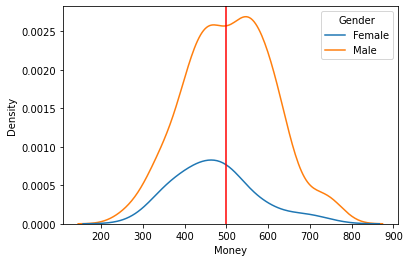

In [ ]:
m=500
s=98
m_sample = rlanders['Money'].mean()
significance = 0.05

sns.kdeplot(data= rlanders, x='Money',hue='Gender' )
plt.axvline(m_sample, color="red")

In [ ]:
#men 
n1=rlanders[rlanders['Gender'] == 'Male']['Money'].count()
m_sample1= rlanders[rlanders['Gender'] == 'Male']['Money'].mean()


p_value1= stats.norm.sf(m_sample1,loc=m,scale=s/math.sqrt(n1))
print(p_value1)

g_value1 = stats.norm.isf(significance,loc=m,scale=s/math.sqrt(n1))
print(g_value1)

#women
n2=rlanders[rlanders['Gender'] == 'Female']['Money'].count()
m_sample2= rlanders[rlanders['Gender'] == 'Female']['Money'].mean()


p_value2= stats.norm.cdf(m_sample2,loc=m,scale=s/math.sqrt(n2))
print(p_value2)

g_value2 = stats.norm.isf(1-significance,loc=m,scale=s/math.sqrt(n2))
print(g_value2)

0.1396357338827816
511.45567640449514
0.01988789146266692
477.64618457402185


#**Hoofdstuk 4 Twee kwantitatieve variabelen**

##Functies chi-kwadraat


In [ ]:
rlanders = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/rlanders.csv')

In [ ]:
o = pd.crosstab(rlanders.Survey, rlanders.Gender)
alpha=0.05



In [ ]:
chi2,p,df,e= stats.chi2_contingency(o)                                          #expected table opzetten op basis van observed
print("chi²: %.2f" % chi2)
print("p_value: %.2f" % p)
print("degrees of freedom: %d" % df)
print(f"{e}")

#x=np.linspace(0,15,num=100)

#Probability density function
#pdf_value = stats.chi2.pdf(x,df)
#print(pdf_value)

#Inverse starvation functie
g_value=stats.chi2.isf(alpha,df)
print("g_value < chi²")
print("%.2f < %.2f" % (g_value,chi2))                                           #Indien chi-kwadraat kleiner is dan is er geen verband -> H1 verwerpen

chi²: 5.49
p_value: 0.48
degrees of freedom: 6
[[92.09745763  9.25847458  8.28389831  5.36016949]
 [18.41949153  1.85169492  1.65677966  1.0720339 ]
 [78.48305085  7.88983051  7.05932203  4.56779661]]
[0.         0.00133012 0.00493231 0.01028801 0.01695539 0.0245599
 0.03278597 0.04136953 0.05009142 0.05877157 0.06726377 0.07545108
 0.0832418  0.09056588 0.09737172 0.10362349 0.10929859 0.1143856
 0.11888236 0.12279438 0.12613343 0.12891626 0.13116361 0.13289927
 0.13414927 0.13494125 0.1353039  0.13526644 0.13485824 0.13410851
 0.13304598 0.13169871 0.13009392 0.12825781 0.1262155  0.12399091
 0.12160674 0.11908444 0.11644414 0.11370474 0.11088384 0.10799779
 0.10506175 0.10208969 0.09909443 0.0960877  0.09308021 0.09008164
 0.08710076 0.08414543 0.08122268 0.07833873 0.0754991  0.07270859
 0.06997138 0.06729103 0.06467058 0.06211254 0.05961897 0.05719149
 0.05483134 0.05253937 0.05031616 0.04816196 0.04607675 0.04406031
 0.04211217 0.04023169 0.03841805 0.03667031 0.03498738 0.033368

## tabellen opzetten

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/MuziekWijn.csv')
df.head()

df = df.rename(columns={' Wijn': 'Wijn'})                      #Wijzigt de naam van de kolom
df.columns

Index(['Muziek', 'Wijn'], dtype='object')

In [ ]:
#OBSERVED TABEL
o = pd.crosstab(df.Muziek,df.Wijn)                   #observed tabel opzetten
#print(o)

#marginale totalen bereken
row_sums = o.sum(axis=1)
col_sums = o.sum()
n=row_sums.sum()

#print(row_sums)
#print(col_sums)
#print('aantal observaties: %.2f' % n)


#EXPECTED TABEL OPZETTEN
e= np.outer(row_sums,col_sums)/n                      #expected tabel opzetten
print(e)

e_row_sums = e.sum(axis = 1)                    
e_col_sum = e.sum(axis = 0)
n = e_row_sums.sum()

#print(e_row_sums)
##print(e_col_sum)
#print('aantal observaties: %d' %n)


#SPREIDINGSTABEL
diffs = (e-o)**2/e                                    #Spreidings tabel opzetten
print("Spreidingstabel: ")
print(diffs)

[[34.87654321 30.55555556  9.56790123]
 [39.0617284  34.22222222 10.71604938]
 [39.0617284  34.22222222 10.71604938]]
Spreidingstabel: 
Wijn          Andere    Franse   Italiaanse
Muziek                                     
Franse      0.000437  2.333737     7.672417
Geen        0.397063  0.520924     0.007524
Italiaanse  0.422348  0.520924     6.403837


##Chi-kwadraat en Cramers_V

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/MuziekWijn.csv')
df.head()
df = df.rename(columns={' Wijn': 'Wijn'})                      #Wijzigt de naam van de kolom

In [ ]:
o = pd.crosstab(df.Muziek,df.Wijn)                   #observed tabel opzetten
e= np.outer(row_sums,col_sums)/n                      #expected tabel opzetten
row_sums = o.sum(axis=1)
n=row_sums.sum()

In [ ]:
#Chi-kwadraat berekenen
diffs = (e-o)**2/e                                    #Spreidings tabel opzetten
chi2 = diffs.values.sum()
print("chi-kwadraat: %.2f" %chi2)

chi-kwadraat: 18.28


In [ ]:
#Cramers V berekenen
dof = min(o.shape)-1
cramers_v = np.sqrt(chi2 / (dof*n))
print("Cramers V: %.3f" % cramers_v)      
print("0.1=weak assocation, 0.25=moderate assocation, 0.5=strong assocation, 0.75=very strong assocation, 1=complete assocation")

Cramers V: 0.194
0.1=weak assocation, 0.25=moderate assocation, 0.5=strong assocation, 0.75=very strong assocation, 1=complete assocation


In [ ]:
rlanders = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/rlanders.csv')

In [ ]:
o = pd.crosstab(rlanders.Survey, rlanders.Gender)

chi2,p,df,e= stats.chi2_contingency(o)                                          #expected table opzetten op basis van observed
print("chi²: %.2f" % chi2)
print("p_value: %.2f" % p)
print("degrees of freedom: %d" % df)
print(f"{e}")


chi²: 4.26
p_value: 0.37
degrees of freedom: 4
[[ 0.832  3.168]
 [12.896 49.104]
 [23.712 90.288]
 [13.52  51.48 ]
 [ 1.04   3.96 ]]


##Goodness of fit test



In [ ]:
o= np.array([127,75,98,27,73])
e_p= np.array([.35, .17,.23,.08,.17])
e= e_p * sum(o)
chi2,p=stats.chisquare(f_obs=o, f_exp=e )
print("chi2: %.2f"%chi2)
print("p: %.2f", p)

chi2: 3.47
p: %.2f 0.4827710008728282


##Grafieken opstellen

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/MuziekWijn.csv')
df.head()

df = df.rename(columns={' Wijn': 'Wijn'})                      #Wijzigt de naam van de kolom

In [ ]:
o = pd.crosstab(df.Muziek,df.Wijn)                   #observed tabel opzetten


In [ ]:
o.loc['Geen']

Wijn
 Andere        43
 Franse        30
 Italiaanse    11
Name: Geen, dtype: int64

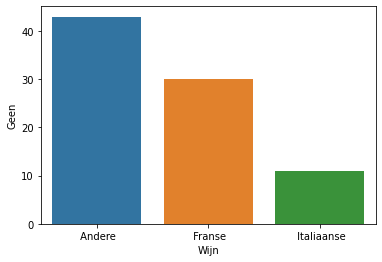

In [ ]:
#Waargenomen waarden
sns.barplot(x=o.loc['Geen'].index, y=o.loc['Geen'])

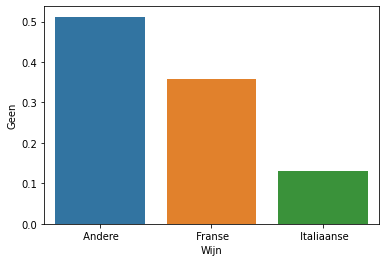

In [ ]:
#Relatieve waarden 
sns.barplot(x=o.loc['Geen'].index, y=o.loc['Geen']/np.sum(o.loc['Geen']))

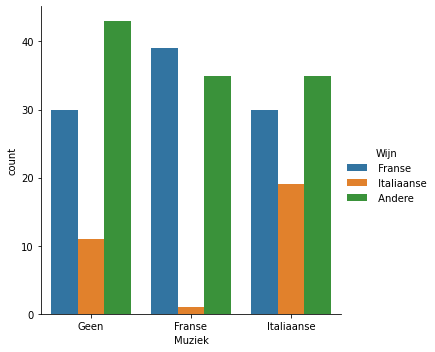

In [ ]:
#Clustered barchart
sns.catplot(data=df,x='Muziek', hue='Wijn',kind='count')

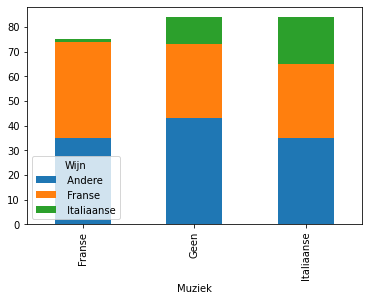

In [ ]:
#Stacked bar chart
o.plot(kind='bar',stacked=True)

##Excercises

### Excercise 1

In [ ]:
survey = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/survey.csv')
survey.head()

,Unnamed: 0,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,2,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
2,3,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
3,4,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
4,5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


In [ ]:
print(survey.Exer.unique())
print(survey.Smoke.unique())

['Some' 'None' 'Freq']
['Never', 'Regul', 'Occas', 'Heavy', NaN]
Categories (4, object): ['Never' < 'Occas' < 'Regul' < 'Heavy']


In [ ]:
survey.Excer = survey.Exer.astype(CategoricalDtype(categories=['None','Some','Freq'], ordered= True))
survey.Smoke = survey.Smoke.astype(CategoricalDtype(categories=['Never','Occas','Regul','Heavy'], ordered= True))

In [ ]:
print(survey.Exer.describe())
print(survey.Smoke.describe())


count      237
unique       3
top       Freq
freq       115
Name: Exer, dtype: object
count       236
unique        4
top       Never
freq        189
Name: Smoke, dtype: object


In [ ]:
o = pd.crosstab(survey.Exer, survey.Smoke)
chi2,p,df,e= stats.chi2_contingency(o)                                          #expected table opzetten op basis van observed
alpha=0.05
g=stats.chi2.isf(alpha,df)

print("g_value < chi²")
print("%.2f < %.2f" % (g_value,chi2))                                           #indien chi-kwadraat kleiner dan is er geen verband -> h1 verwerpen
print("p_value: %.2f" % p)
print("degrees of freedom: %d" % df)


g_value=stats.chi2.isf(alpha,df)



g_value < chi²
9.49 < 5.49
p_value: 0.48
degrees of freedom: 6


### Excercise 2

In [ ]:
digi = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/leeftijden-digimeter.csv')
digi.head(10)

,Leeftijdsgroep,Percentage
0,15-19,6.6
1,20-29,14.2
2,30-39,15.0
3,40-49,16.3
4,50-59,17.3
5,60-64,7.3
6,64+,23.2


In [ ]:
belstat = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/leeftijden-bestat-vl.csv')
belstat.head(20)


,age.group,population
0,0-5,352017
1,5-9,330320
2,10-14,341303
3,15-19,366648
4,20-24,375469
5,25-29,387131
6,30-34,401285
7,35-39,409587
8,40-44,458485
9,45-49,493720


In [ ]:
belstat= belstat[(belstat['age.group'] !='0-5') & (belstat['age.group'] !='5-9') & (belstat['age.group'] !='10-14')]      #eerste 3 groepen eruit filteren
belstat.head()

,age.group,population
3,15-19,366648
4,20-24,375469
5,25-29,387131
6,30-34,401285
7,35-39,409587


In [ ]:
d={'15-19':'15-19','20-24':'20-29','25-29':'20-29','30-34':'30-39','35-39':'30-39','40-44':'40-49','45-49':'40-49','50-54':'50-59','55-59':'50-59','60-64':'60-64'}
belstat['Leeftijdsgroep']=belstat['age.group'].map(d).fillna('64+')
belstat.head(20)

,age.group,population,Leeftijdsgroep
3,15-19,366648,15-19
4,20-24,375469,20-29
5,25-29,387131,20-29
6,30-34,401285,30-39
7,35-39,409587,30-39
8,40-44,458485,40-49
9,45-49,493720,40-49
10,50-54,463668,50-59
11,55-59,413315,50-59
12,60-64,379301,60-64


In [ ]:
belstat = belstat.groupby('Leeftijdsgroep')['population'].sum().reset_index()
belstat.head(10)

,Leeftijdsgroep,population
0,15-19,366648
1,20-29,762600
2,30-39,810872
3,40-49,952205
4,50-59,876983
5,60-64,379301
6,64+,1153491


In [ ]:
tot_population = belstat['population'].sum()
print(tot_population)
belstat['percentage_population']= belstat['population']/tot_population
belstat.head(10)

5302100


,Leeftijdsgroep,population,percentage_population
0,15-19,366648,0.069151
1,20-29,762600,0.143830
2,30-39,810872,0.152934
3,40-49,952205,0.179590
4,50-59,876983,0.165403
5,60-64,379301,0.071538
6,64+,1153491,0.217554


In [ ]:
n = 2164
e_p= np.array(belstat['percentage_population'])
e= e_p*n
print(e)

[149.64377737 311.24769431 330.94943664 388.63311141 357.93199148
 154.80797495 470.78601384]


In [ ]:
o = np.array(digi['Percentage']) /100 *n
print(o)

[142.824 307.288 324.6   352.732 374.372 157.972 502.048]


In [ ]:
alpha = 0.05
k=len(o)
df=k-1
g=stats.chi2.isf(alpha, df)
#chi2,p,df,e= stats.chi2_contingency(o)    
chi2,p=stats.chisquare(f_obs=o, f_exp=e )
print("k: %.2f" %k)
print("df: %.2f" % df)
print('chi-kwadraat: %.2f'% chi2)
print("g value %.2f" % g)
print("p value: %.2f" %p)

k: 7.00
df: 6.00
chi-kwadraat: 6.70
g value 12.59
p value: 0.35


#**Hoodstuk 5 kwalitatieve en kwantitatieve variabele**

In [2]:
!pip install --upgrade scipy==1.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##unpaired samples

In [ ]:
control=np.array([91,87,99,77,88,91])
treatment=np.array([101,110,103,93,99,104])

In [ ]:
test = stats.ttest_ind(a=control, b=treatment,alternative='less', equal_var=False)  #less -> gemiddelde van control groep is kleiner dan gemm van de treatment groep
                                                                                    #equal_var=false -> er wordt van uit gegaan dat s1 != s2
print(test)
print("p value is kleiner dan 0.05 dus er is wel een significant verschil -> h0 verwerpen")

Ttest_indResult(statistic=-3.445612673536487, pvalue=0.003391230079206901)
p value is kleiner dan 0.05 dus er is wel een significant verschil -> h0 verwerpen


In [ ]:
stats.ttest_ind(alternative= 'two-sided', a=tips.tip[tips.sex == 'Male'], b=tips.tip[tips.sex == 'Female']) #p value is groter dan 0.05 -> h1 word verworpen

Ttest_indResult(statistic=1.3878597054212687, pvalue=0.16645623503456763)

##Paired samples

In [ ]:
regular=  np.array([16,20,21,22,23,22,27,25,27,28])
additives=  np.array([19,22,24,24,25,25,26,26,28,32])

In [ ]:
stats.ttest_rel(regular,additives,alternative='less')

Ttest_relResult(statistic=-4.47213595499958, pvalue=0.00077494295585091)

##Effect size (cohens d) - EMPTY -

##grafieken opstellen

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


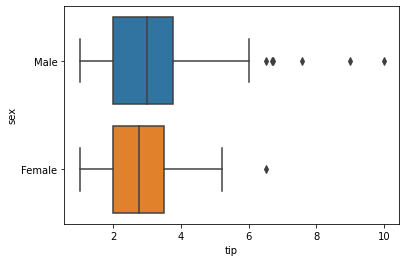

In [ ]:
sns.boxplot(data=tips, x='tip',y='sex')

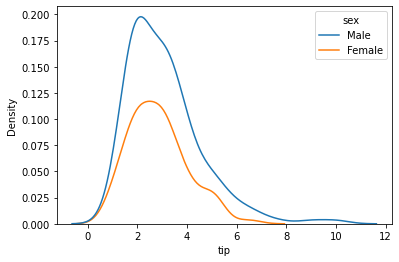

In [ ]:
#density plot
sns.kdeplot(data=tips, hue="sex",x='tip')

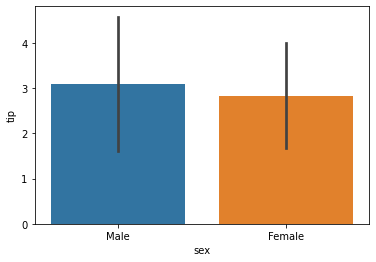

In [ ]:
#bar chart with error bars
sns.barplot(data=tips, x='sex', y='tip',ci='sd')

## Excercises

###Excersice 1

In [ ]:
android = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/android_persistence_cpu.csv', delimiter=';')
android.head()

,Time,PersistenceType,DataSize
0,1.81,Sharedpreferences,Small
1,1.35,Sharedpreferences,Small
2,1.84,Sharedpreferences,Small
3,1.54,Sharedpreferences,Small
4,1.81,Sharedpreferences,Small


In [ ]:
android.groupby(['DataSize','PersistenceType'])['Time'].mean()

DataSize  PersistenceType  
Large     GreenDAO             12.110333
          Realm                10.651667
          SQLLite              11.515000
Medium    GreenDAO              7.454000
          Realm                 5.818000
          SQLLite               7.794000
Small     GreenDAO              1.893667
          Realm                 1.599000
          SQLLite               1.799000
          Sharedpreferences     1.673667
Name: Time, dtype: float64

In [ ]:
realm=np.array(android[(android.DataSize=='Small') & (android.PersistenceType=='Realm')]['Time'])
print(realm)
sharedPreferences = np.array(android[(android.DataSize=='Small') & (android.PersistenceType=='Sharedpreferences')]['Time'])
print(sharedPreferences)

[1.57 1.77 1.75 1.78 1.36 2.17 1.58 1.59 1.36 1.55 1.33 1.96 1.58 1.59
 1.78 1.31 1.59 2.25 1.34 2.27 1.74 1.31 1.81 1.13 1.58 1.14 1.98 1.33
 1.12 1.35]
[1.81 1.35 1.84 1.54 1.81 1.82 1.79 1.57 1.78 1.79 1.97 1.6  1.77 2.23
 1.79 1.77 1.32 1.76 2.   1.3  1.77 1.35 1.56 1.79 1.31 2.23 1.83 1.09
 1.57 1.1 ]


In [ ]:
stats.ttest_ind(a=realm,b=sharedPreferences, alternative = 'less', equal_var=False)

Ttest_indResult(statistic=-0.9624716662718158, pvalue=0.16992370571901433)

###Excersice 2 

In [ ]:
scores= pd.read_csv("https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/test-results.csv")
scores.head()

,Session,Score
0,A,12.5
1,A,7.5
2,A,NaN
3,A,21.0
4,A,10.0


In [ ]:
scores = scores.dropna()
scores.head()

,Session,Score
0,A,12.5
1,A,7.5
3,A,21.0
4,A,10.0
5,A,20.5


In [ ]:
scores.groupby('Session').describe()

Score                                                          
        count       mean       std   min     25%     50%     75%    max
Session                                                                
A        17.0  13.117647  6.040306   4.0   8.000  12.500  17.000  26.50
B        21.0  17.214286  9.150917   1.0  10.000  14.500  26.500  31.50
C        25.0  18.800000  6.539941  10.0  13.000  18.500  22.000  34.50
D        26.0  22.451923  4.641670  13.0  19.125  22.125  25.750  30.50
E        22.0  18.852273  7.010052   0.0  16.375  19.250  21.375  30.75
F        27.0  17.814815  6.274028   6.5  12.875  17.500  22.000  32.00
G        29.0  18.736207  5.261126  10.0  16.500  18.750  23.000  27.75
H        28.0  20.946429  8.133537   3.0  15.750  22.000  26.625  34.50

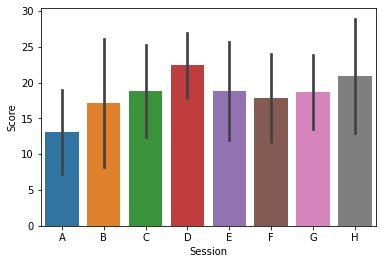

In [ ]:
sns.barplot(data=scores,x='Session',y='Score', ci='sd')

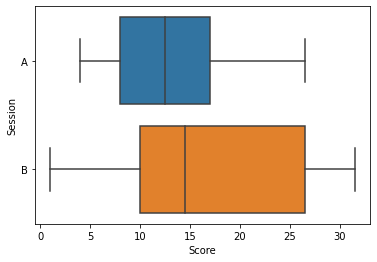

In [ ]:
sns.boxplot(data=scores[(scores.Session=='A') | (scores.Session=='B')],x="Score",y='Session')

In [ ]:
a = np.array(scores[scores.Session == 'A']['Score'])
b = np.array(scores[scores.Session=='B'].Score)
print(a)
print(b)
stats.ttest_ind(a=a,b=b,alternative='less',equal_var=False)

[12.5  7.5 21.  10.  20.5 14.   4.   7.   7.5  8.  13.5 26.5 18.  16.
 10.5 17.   9.5]
[21.5 10.  17.5 14.  28.  26.5  5.5 12.  31.5 14.5 11.5 27.  27.5 13.5
 26.  27.5  1.   7.   6.  23.5 10. ]


Ttest_indResult(statistic=-1.6541070146039145, pvalue=0.053557184014211265)

#**Hoofdstuk 6 Twee kwantitatieve variabelen**

##Som van de kleinste kwadraten

In [ ]:
penguins = sns.load_dataset('penguins') # Load the Palmer Penguins demo dataset
male_chinstrap = penguins[(penguins['species'] == 'Chinstrap') & (penguins['sex'] == 'Male')]
male_chinstrap = male_chinstrap.groupby('flipper_length_mm')['body_mass_g'].mean().reset_index()
male_chinstrap.head()

,flipper_length_mm,body_mass_g
0,187.0,3250.000000
1,191.0,3400.000000
2,193.0,3741.666667
3,194.0,3775.000000
4,195.0,4000.000000


In [ ]:
mx = male_chinstrap.flipper_length_mm.mean()
my = male_chinstrap.body_mass_g.mean()
xx = male_chinstrap.flipper_length_mm - mx
yy = male_chinstrap.body_mass_g - my

In [ ]:
beta1 = sum(xx * yy) / sum(xx ** 2)
beta0 = my - beta1 * mx

# Regression line equation
print(f"ŷ = {beta0:.2f} + {beta1:.2f} x")

ŷ = -3868.33 + 38.83 x


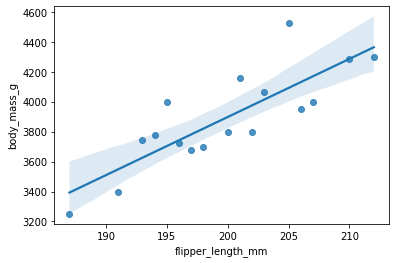

In [ ]:
sns.regplot(x=male_chinstrap.flipper_length_mm, y=male_chinstrap.body_mass_g)

##lineaire regressie (Vergelijking van de rechte)

In [ ]:
penguins = sns.load_dataset('penguins') # Load the Palmer Penguins demo dataset

In [ ]:
male_chinstrap = penguins[(penguins['species'] == 'Chinstrap') & (penguins['sex'] == 'Male')]
male_chinstrap = male_chinstrap.groupby('flipper_length_mm')['body_mass_g'].mean().reset_index()

male_chinstrap_x = male_chinstrap.flipper_length_mm.values.reshape(-1,1)
male_chinstrap_y = male_chinstrap.body_mass_g

In [ ]:
weight_model = LinearRegression().fit(male_chinstrap_x, male_chinstrap_y)                   #geeft de optimale rechte voor de waargenomen waarden
print("Regressie rechte y = %.2f + %.2fx"%(weight_model.intercept_, weight_model.coef_[0]))

Regressie rechte y = -3868.33 + 38.83x


##Covariantie & corelatie(R)

In [ ]:
families =  pd.DataFrame(data={'x':[1,1,2,2,2,2,3,3,3,3,4,4,4,5,6],
                               'y':[2,3,2,3,4,5,2,3,4,5,5,6,8,6,7]})

In [ ]:
mx= families.x.mean()
my= families.y.mean()

cov = sum((families.x - mx) * (families.y - my)) / (len(families.x) -1)            #cov > 0 relatie verterkt
print("Cov(x,y): %.2f"%cov)                                                        #cov < 0 relatie verzwakt
                                                                                   #cov = 1 er is geen relatie
#corelatie(R) berekenen
R = cov / (families.x.std() * families.y.std())                                    #Pearson's coefficient
#R = np.corrcoef(families.x, families.y)[0,1]
print("R: %.2f" % R)


R2 =R**2                                                                           #R² 
print("%.2f%% van de (originele) variatie wordt verklaardt door de onafhankelijke (veranderlijke) variabele" %(R2*100) )

Cov(x,y): 2.00
R: 0.75
56.76% van de (originele) variatie wordt verklaardt door de onafhankelijke (veranderlijke) variabele


##Grafieken tekenen

In [ ]:
landbouw = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/Landbouw%20Vlaanderen.csv',delimiter = ';')
aantal = 'aantal land en tuinbouwbedrijven'
opp = 'gemiddelde oppervlakte per bedrijf (ha)'
landbouw[opp] = landbouw[opp].str.replace(",",".").astype(float)     #Maakt van object een float + vervang te punten naar komma's

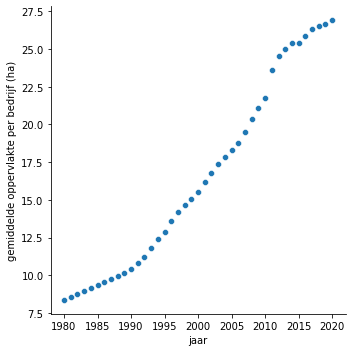

In [ ]:
sns.relplot(data=landbouw,x='jaar',y=opp)

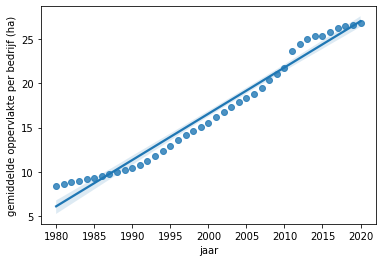

In [ ]:
g=sns.regplot(data=landbouw , x='jaar',y=opp)
#g.set(xlim=(1980,2035))
#g.set(ylim=(7.5,40))

##oefeningen

###Oefening 1

In [ ]:
cats = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/Cats.csv')
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


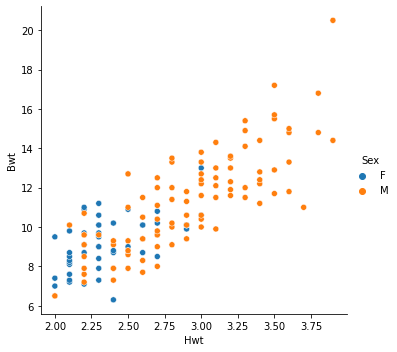

In [ ]:
sns.relplot(data=cats,x='Hwt',y='Bwt',hue='Sex')

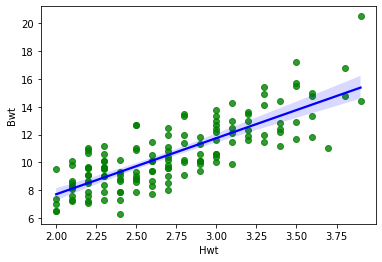

In [ ]:
sns.regplot(x=cats.Hwt,y=cats.Bwt,line_kws={'color':'b'}, scatter_kws = {'color':'g'})

In [ ]:
x= cats.Hwt.values.reshape(-1,1)
y= cats.Bwt.values.reshape(-1,1)

weight_model=LinearRegression().fit(x,y)

print(" regressie rechte y= %.2f + %.2fx" % (weight_model.intercept_,weight_model.coef_))

 regressie rechte y= -0.35 + 4.03x


In [ ]:
corr= np.corrcoef(cats.Hwt,cats.Bwt)[0,1]
print('R = %.2f' %corr)
print('R²= %.2f' % corr**2)

R = 0.80
R²= 0.65


In [ ]:
#mannetjes katten
x= cats[cats.Sex=='M'].Hwt.values.reshape(-1,1)
y= cats[cats.Sex=='M'].Bwt.values.reshape(-1,1)

weight_model=LinearRegression().fit(x,y)

print(" regressie rechte y= %.2f + %.2fx" % (weight_model.intercept_,weight_model.coef_))

corr= np.corrcoef(cats[cats.Sex=='M'].Hwt,cats[cats.Sex=='M'].Bwt)[0,1]
print('R = %.2f' %corr)
print('R²= %.2f%%' % (corr**2*100))

 regressie rechte y= -1.18 + 4.31x
R = 0.79
R²= 62.89%


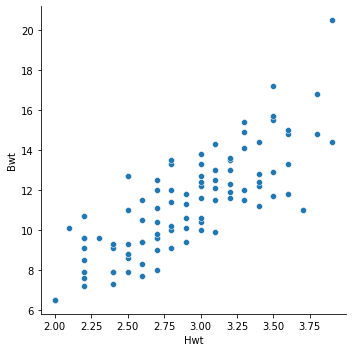

In [ ]:
sns.relplot(data=cats[cats.Sex=='M'], x='Hwt', y='Bwt')

In [ ]:
#Vrouwtjes katten
x= cats[cats.Sex=='F'].Hwt.values.reshape(-1,1)
y= cats[cats.Sex=='F'].Bwt.values.reshape(-1,1)

weight_model=LinearRegression().fit(x,y)

print(" regressie rechte y= %.2f + %.2fx" % (weight_model.intercept_,weight_model.coef_))

corr= np.corrcoef(cats[cats.Sex=='F'].Hwt,cats[cats.Sex=='F'].Bwt)[0,1]
print('R = %.2f' %corr)
print('R²= %.2f%%' % (corr**2*100))

 regressie rechte y= 2.98 + 2.64x
R = 0.53
R²= 28.31%


###Oefening 2

In [ ]:
landbouw = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/Landbouw%20Vlaanderen.csv',delimiter = ';')
landbouw.head()

,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha)
0,1980,75706,"8,38"
1,1981,73292,"8,58"
2,1982,71255,"8,79"
3,1983,69807,"8,94"
4,1984,68083,"9,15"


In [ ]:
landbouw.dtypes

jaar                                        int64
aantal land en tuinbouwbedrijven            int64
gemiddelde oppervlakte per bedrijf (ha)    object
dtype: object

In [ ]:
aantal = 'aantal land en tuinbouwbedrijven'
opp = 'gemiddelde oppervlakte per bedrijf (ha)'
landbouw[opp] = landbouw[opp].str.replace(",",".").astype(float)     #Maakt van object een float + vervang te punten naar komma's

In [ ]:
corr = np.corrcoef(landbouw.jaar,landbouw[aantal])[0,1]
print("R = %.2f"%corr)

R = -0.99


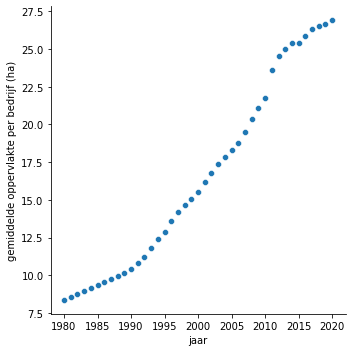

In [ ]:
sns.relplot(data=landbouw , x='jaar',y=opp)


[(7.5, 40.0)]

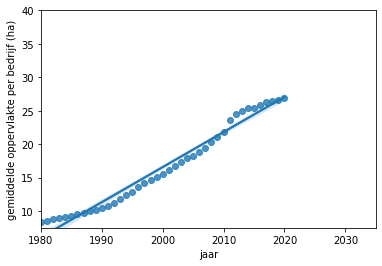

In [ ]:
g=sns.regplot(data=landbouw , x='jaar',y=opp)
g.set(xlim=(1980,2035))
g.set(ylim=(7.5,40))

###Oefening 3

In [ ]:
movies = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/Movies_2006_2007.csv',delimiter=';')
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,$22 707 121,$32 109 139,$39 517 763,$11 000 000,$15 909 367,$16 000 000
1,2.0,Year of the Dog,Paramount Vantage,Drama,$141 803,$318 598,$1 540 141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,$12 839 402,NaN,$22 466 994,$18 200 000,$27 040 983,$25 000 000
3,4.0,Stomp the Yard,Sony Pictures,Drama,$28 263 594,$42 853 277,$61 356 221,$15 000 000,$33 166 898,$14 000 000
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,$39 868 642,$44 407 533,$38 189 217,$16 500 000


In [ ]:
cols_with_dollars=['7-day Gross','14-day Gross','Total US Gross','International Gross','US DVD Sales','Budget']


In [ ]:
for c in cols_with_dollars:
  movies[c]=movies[c].str.replace('$','').str.replace(' ','').astype(float) /1000000                 #Gaat dollars veranderen naar floats
movies.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22.707121,32.109139,39.517763,11.000000,15.909367,16.0
1,2.0,Year of the Dog,Paramount Vantage,Drama,0.141803,0.318598,1.540141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,12.839402,NaN,22.466994,18.200000,27.040983,25.0
3,4.0,Stomp the Yard,Sony Pictures,Drama,28.263594,42.853277,61.356221,15.000000,33.166898,14.0
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,39.868642,44.407533,38.189217,16.5


In [ ]:
zeven_dagen= movies.dropna(subset=['7-day Gross'])           #Drop de rijen waarbij de 7-day gross niet ingevuld is, en plaats de rijen dat wel ingevuld zijn in zeven_dagen
veertien_dagen =movies.dropna(subset=['14-day Gross'])              #Drop de rijen waarbij de 7-day gross niet ingevuld is, en plaats deze in veertien_dagen
#movies.dropna()                                                    #dropped elke rij waar er een Nan in zit, bovenstaande regels gaan enkel de rijen droppen waarbij er in de aangegeven kolom een Nan staat
zeven_dagen.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22.707121,32.109139,39.517763,11.000000,15.909367,16.0
1,2.0,Year of the Dog,Paramount Vantage,Drama,0.141803,0.318598,1.540141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,12.839402,NaN,22.466994,18.200000,27.040983,25.0
3,4.0,Stomp the Yard,Sony Pictures,Drama,28.263594,42.853277,61.356221,15.000000,33.166898,14.0
5,6.0,Pirates of the Caribbean: At World's End,Buena Vista,Adventure,173.339068,232.297818,309.420425,651.576067,295.701718,300.0


In [ ]:
q1 = zeven_dagen['7-day Gross'].quantile(0.25)
q3= zeven_dagen['7-day Gross'].quantile(0.75)
limit_7_days_gross=q3+1.5*(93-91)

Text(0.5, 1.0, '1Day Gross vs Total US Gross')

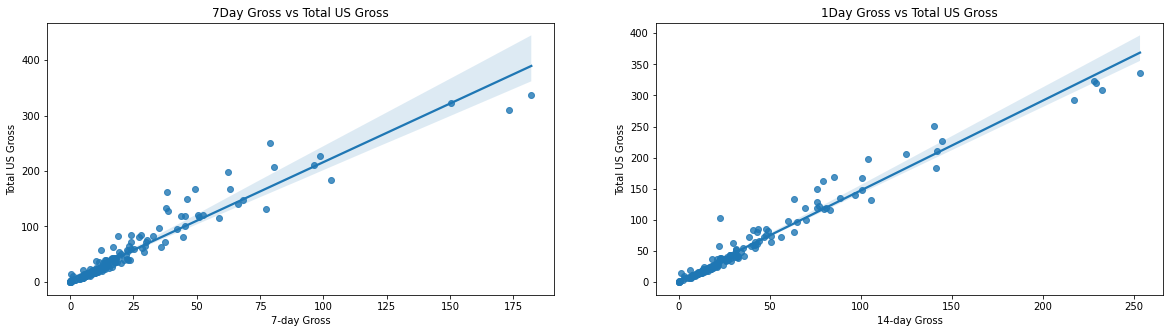

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(20,5))
sns.regplot(ax=axs[0], data=movies,x='7-day Gross', y='Total US Gross')
axs[0].set_title("7Day Gross vs Total US Gross")
sns.regplot(ax=axs[1],data=movies,x='14-day Gross',y='Total US Gross')
axs[1].set_title("1Day Gross vs Total US Gross")

In [ ]:
R = np.corrcoef(zeven_dagen['7-day Gross'], zeven_dagen['Total US Gross'])[0,1]
print("R: %.2f" % R)


R2 =R**2                                                                           #R² 
print("%.2f%% van de (originele) variatie wordt verklaardt door de onafhankelijke (veranderlijke) variabele" %(R2*100) )

R = np.corrcoef(veertien_dagen['14-day Gross'], veertien_dagen['Total US Gross'])[0,1]
print("R: %.2f" % R)


R2 =R**2                                                                           #R² 
print("%.2f%% van de (originele) variatie wordt verklaardt door de onafhankelijke (veranderlijke) variabele" %(R2*100) )

R: 0.96
92.05% van de (originele) variatie wordt verklaardt door de onafhankelijke (veranderlijke) variabele
R: 0.98
96.30% van de (originele) variatie wordt verklaardt door de onafhankelijke (veranderlijke) variabele


In [ ]:
weight_model = LinearRegression().fit(zeven_dagen['7-day Gross'].values.reshape(-1,1), zeven_dagen['Total US Gross'])  
print("7dagen y = %.2f + %.2fx"%(weight_model.intercept_, weight_model.coef_[0]))

weight_model = LinearRegression().fit(veertien_dagen['14-day Gross'].values.reshape(-1,1), veertien_dagen['Total US Gross'])  
print("14dagen y = %.2f + %.2fx"%(weight_model.intercept_, weight_model.coef_[0]))

7dagen y = 4.59 + 2.11x
14dagen y = 2.45 + 1.45x


#**Hoofdstuk 7 tijdreeksen**

In [3]:
!pip install matplotlib == 3.4.3
!pip install --upgrade statsmodels

ERROR: Invalid requirement: '=='
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', parse_dates=['date']).set_index(['date'])

In [64]:
covid = covid[covid.iso_code == 'BEL'][['new_cases']]

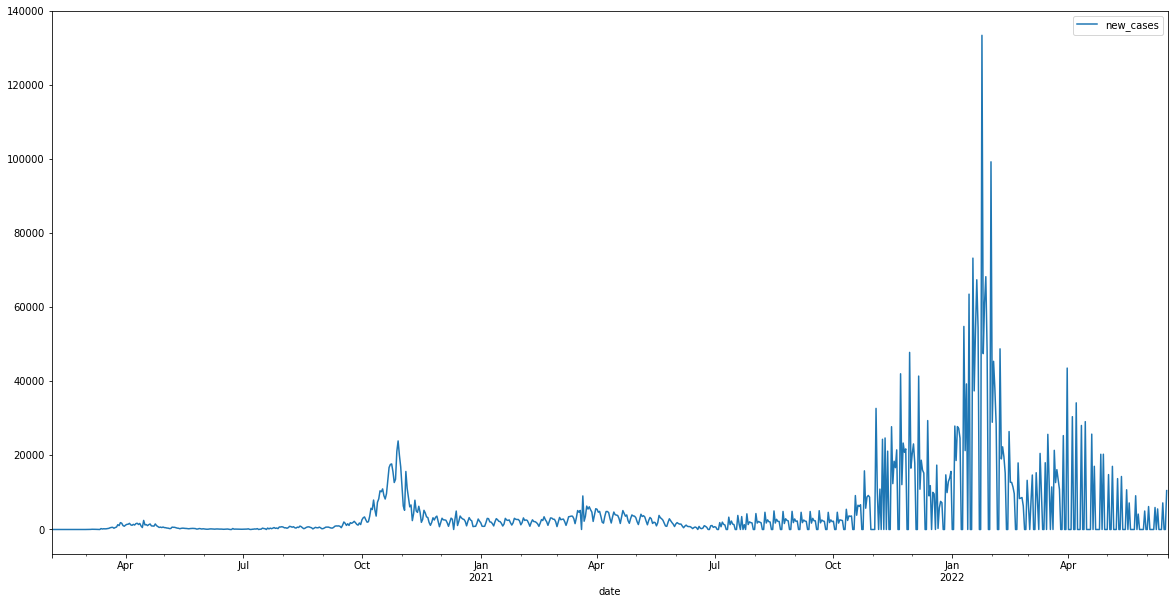

In [6]:
covid.plot(figsize=(20,10))

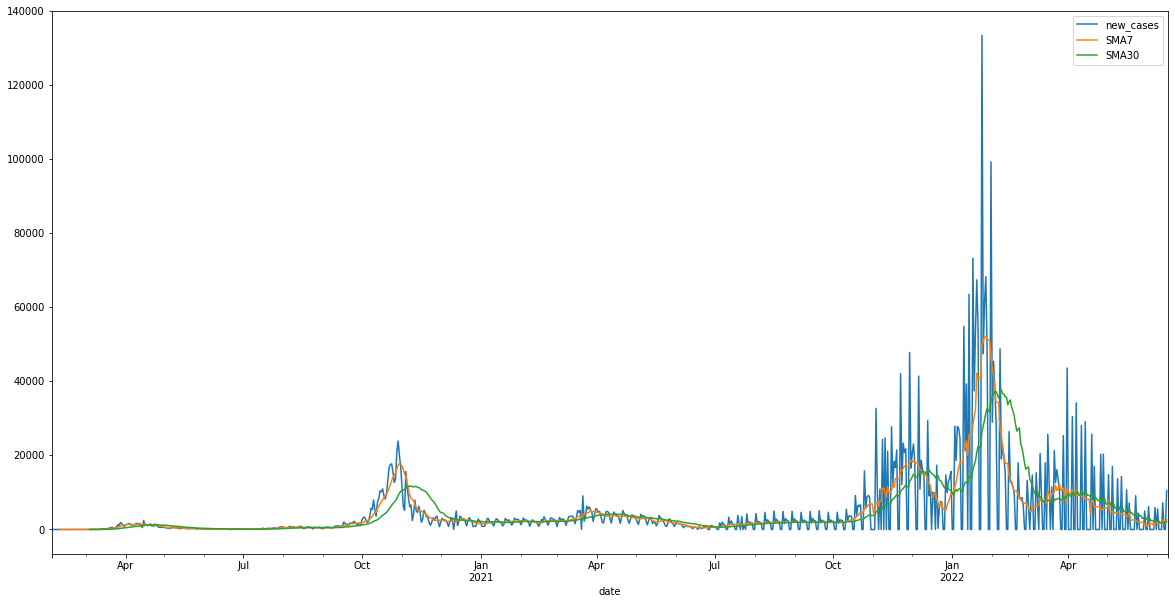

In [7]:
covid['SMA7'] = covid['new_cases'].rolling(7).mean()
covid['SMA30'] = covid['new_cases'].rolling(30).mean()
covid.plot(figsize=(20,10))

In [20]:
start_date = datetime.strptime('2020-12-01','%Y-%m-%d')
end_date= datetime.strptime('2021-02-28','%Y-%m-%d')

new_cases_early_2021 = covid[start_date:end_date]

new_cases_early_2021.head()

,new_cases,SMA7,SMA30
date,,,
2020-12-01,1867.0,2487.000000,4606.466667
2020-12-02,3040.0,2469.285714,4496.566667
2020-12-03,2605.0,2475.000000,4410.533333
2020-12-04,2582.0,2372.857143,3974.200000
2020-12-05,2503.0,2213.428571,3686.700000


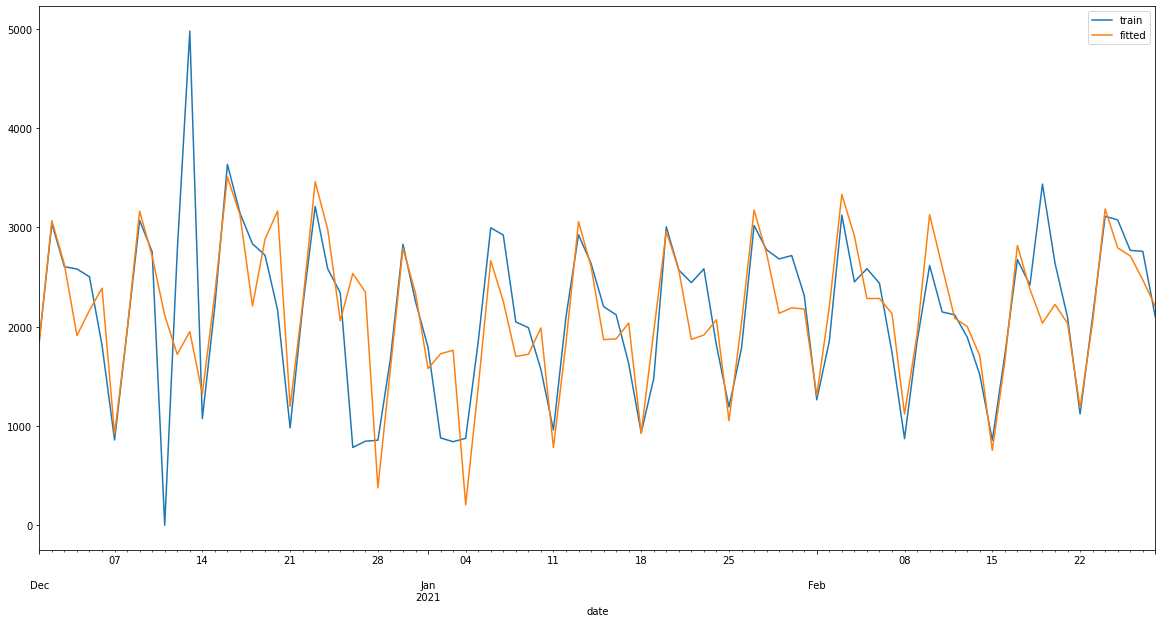

In [45]:
#trainen van model
wounded_hw = ExponentialSmoothing(new_cases_early_2021.new_cases,trend='add', seasonal = 'add', seasonal_periods=7 , freq='D').fit()                  #Freq='D werken met days,seasonal periodes = aantal dagen voor 1 season/herhaling
                                                                                                                                                      #.new_cases = trained data
                                                                                                                                                      #wintersholtmodel heeft trend en seasonal 'add' nodig, anders is het geen wintersholtmodel
 
 #fitted
new_cases_early_2021.plot(y='new_cases',legend=True,label='train',figsize=(20,10))
wounded_hw.fittedvalues.plot(legend=True,label = 'fitted')



Text(0.5, 1.0, 'train,test,fitted & predicted values using holt winter')

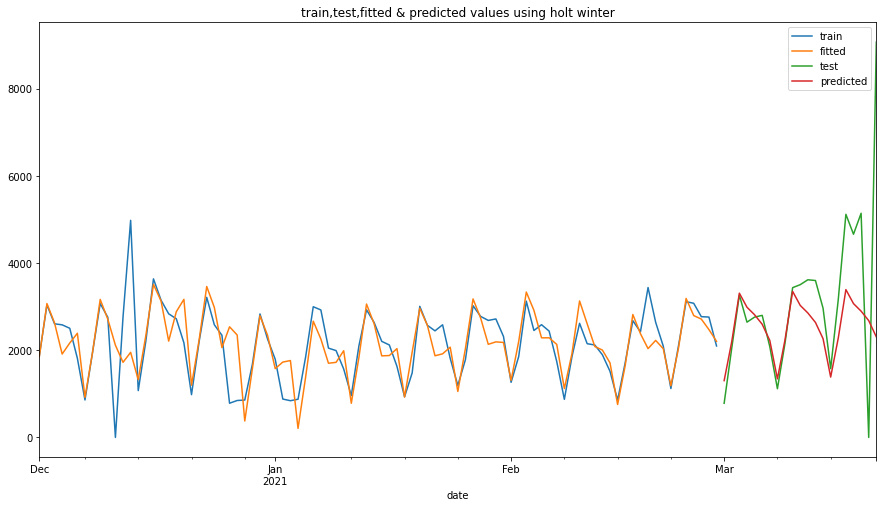

In [51]:
#forecast voor volgende 21 dagen
march1= datetime.strptime('2021-03-01','%Y-%m-%d')
march21=datetime.strptime('2021-03-21','%Y-%m-%d')

test_data = covid[march1:march21]['new_cases']

wounded_predicted = wounded_hw.forecast(21)

new_cases_early_2021.plot(y='new_cases',legend=True,label='train',figsize=(15,8))                         #train = de waargenomen data voor de periode (historische data)
wounded_hw.fittedvalues.plot(legend=True,label='fitted')                                                  #fitted = het model dat opgebouwd is aan de hand van train 

test_data.plot(legend=True,label='test')                                                                  #test = de eigelijke data van de toekomst ( is ook historische data)
wounded_predicted.plot(legend=True,label='predicted')                                                     #predicted = data dat voorspeld wordt door de ai, getrained door de data van train

plt.title('train,test,fitted & predicted values using holt winter')

In [59]:
#MAE & MSE
MAE= mean_absolute_error(test_data,wounded_predicted)
MSE = mean_squared_error(test_data,wounded_predicted)
std = covid[start_date:march21]['new_cases'].std()


print('MAE = %.2f' % MAE)
print('MSE = %.2f'% MSE)
print(' %.2f'%np.sqrt(MSE))
print('Std = %.2f' %std)

MAE = 991.00
MSE = 3190026.97
 1786.06
Std = 1154.49


##Oefeningen

###Oefening 1

In [66]:
icu = covid[covid.iso_code == 'BEL'][['icu_patients']].dropna()
